In [127]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from Bio import Entrez, SeqIO, AlignIO, pairwise2, Align, Seq, motifs
from Bio.Seq import Seq
from Bio.SeqFeature import SeqFeature, FeatureLocation


In [156]:
project_dir = 'D:/Project_Data/Project_6'
genome_datasets_dir = project_dir + '/Datasets/NCBI_Datasets'
literature_datasets_dir = project_dir + '/Datasets/Data_From_Publications'
genome_record = next(SeqIO.parse(genome_datasets_dir + '/GCF_000195955.2/genomic.gbff', "genbank"))
full_sequence = genome_record.seq

In [2]:
cryptic_input_path = "D:/Project_Data/CRYPTIC_DATA/"
cryptic_output_path = "D:/Project_Data/CRYPTIC_DATA/Cryptic_Data_Analysis"

In [3]:
variant_count_dict = {}
chunksize = 0.5 * (10 ** 7) 
chunknum = 1
with pd.read_csv(cryptic_input_path + "VARIANTS.csv", chunksize=chunksize) as reader:
    for chunk in reader:
        print("Chunk " + str(chunknum)) 
        chunknum += 1
        for i, r in chunk.iterrows():
            if r['GENOME_INDEX'] in variant_count_dict:
                variant_count_dict[r['GENOME_INDEX']] = variant_count_dict[r['GENOME_INDEX']] + 1
            else:
                variant_count_dict[r['GENOME_INDEX']] = 1
with open(cryptic_output_path + '/' + 'variant_count_dictionary.pkl', 'wb') as f:
    pickle.dump(variant_count_dict, f)

Chunk 1
Chunk 2


C:\Users\nicho\AppData\Local\Temp/ipykernel_21256/1633710761.py:5: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


Chunk 3


C:\Users\nicho\AppData\Local\Temp/ipykernel_21256/1633710761.py:5: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


Chunk 4
Chunk 5
Chunk 6
Chunk 7
Chunk 8
Chunk 9
Chunk 10
Chunk 11
Chunk 12
Chunk 13
Chunk 14


C:\Users\nicho\AppData\Local\Temp/ipykernel_21256/1633710761.py:5: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


Chunk 15
Chunk 16
Chunk 17
Chunk 18
Chunk 19
Chunk 20


In [160]:
cryptic_variant_count_dict = {}
for i in range(len(full_sequence)):
    if i+1 in variant_count_dict:
        cryptic_variant_count_dict[i] = variant_count_dict[i+1]
    else:
        cryptic_variant_count_dict[i] = 0
with open(literature_datasets_dir + '/' + 'cryptic_variant_count_dictionary.pkl','wb') as f:
    pickle.dump(cryptic_variant_count_dict, f)


In [ ]:
for i in range(4099696, 4099098, -1):
    if i in nick_dict:
        print(i, nick_dict[i])
    else:
        print(i, 0)

In [165]:
print(variant_count_dict[4099403])

10


In [10]:
max_key = 0
for key, value in variant_count_dict.items():
    if key > max_key:
        max_key = key
print(max_key)

4411529


In [14]:
nick_dict = []
for i in range(max_key + 1):
    if i in variant_count_dict:
        nick_dict.append(variant_count_dict[i])
    else:
        nick_dict.append(0)


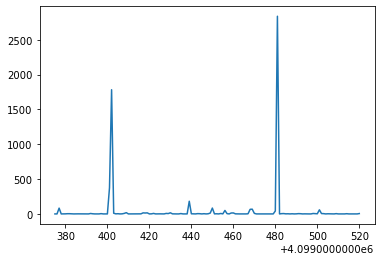

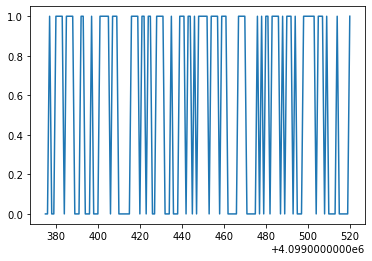

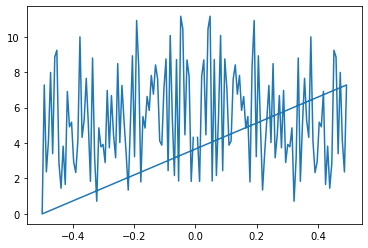

In [104]:
start = 4099375
end = 4099521
x_ax = list(range(start,end))
y_ax = nick_dict[start:end]
y_alt_ax = nick_dict[start:end]
for i, val in enumerate(y_ax):
    if val > 0:
        y_alt_ax[i] = val
        y_ax[i] = 1
        
plt.plot(x_ax, y_alt_ax)
plt.show()

plt.plot(x_ax, y_ax)
plt.show()

# Number of samples in normalized_tone
N = len(x_ax)

yf = fft(y_ax)
xf = fftfreq(N, 1)

plt.plot(xf[1:], np.abs(yf)[1:])
plt.show()


In [114]:
temp = []
chunksize = 0.5 * (10 ** 7) 
chunknum = 0
with pd.read_csv(cryptic_input_path + "VARIANTS.csv", chunksize=chunksize) as reader:
    for chunk in reader:
        chunknum += 1
        print(chunknum)
        for i, r in chunk.iterrows():
            if r['GENOME_INDEX'] in range(start,end):
                temp.append([r['UNIQUEID'], r['GENOME_INDEX'], r['REF'],r['ALT'],r['MUTATION_TYPE']])
df = pd.DataFrame(temp, columns = ['UNIQUEID', 'GENOME_INDEX','REF','ALT','MUTATION_TYPE'])
df.to_csv(cryptic_output_path + '/' + 'upstream_3660.csv')

1
2


C:\Users\nicho\AppData\Local\Temp/ipykernel_21256/1603426384.py:5: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


3


C:\Users\nicho\AppData\Local\Temp/ipykernel_21256/1603426384.py:5: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


4
5
6
7
8
9
10
11
12
13
14


C:\Users\nicho\AppData\Local\Temp/ipykernel_21256/1603426384.py:5: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


15
16
17
18
19
20


In [115]:
print(df)

                                               UNIQUEID  GENOME_INDEX  REF  \
0                    site.02.subj.0958.lab.22A197.iso.1       4099401  cag   
1                site.02.subj.0691.lab.2014241055.iso.1       4099481    g   
2                site.02.subj.0330.lab.2015235158.iso.1       4099481    g   
3                site.02.subj.0750.lab.2013235025.iso.1       4099382    c   
4                site.02.subj.0151.lab.2013232055.iso.1       4099481    g   
...                                                 ...           ...  ...   
5919       site.10.subj.YA00067932.lab.YA00067932.iso.1       4099481    g   
5920       site.10.subj.YA00133952.lab.YA00133952.iso.1       4099481    g   
5921       site.10.subj.YA00029870.lab.YA00029870.iso.1       4099481    g   
5922  site.10.subj.SACG01343657_S3.lab.CG01343657_S3...       4099481    g   
5923       site.10.subj.PH00493578.lab.PH00493578.iso.1       4099481    g   

       ALT MUTATION_TYPE  
0     cagg         INDEL  
1        

In [118]:
nick= df[['GENOME_INDEX', 'REF','ALT']]
a = nick.drop_duplicates()

In [119]:
a

,GENOME_INDEX,REF,ALT
0,4099401,cag,cagg
1,4099481,g,a
3,4099382,c,t
7,4099380,g,a
15,4099460,c,a
...,...,...,...
5308,4099385,a,t
5444,4099393,ac,acc
5527,4099455,t,c
5616,4099407,g,t


In [120]:
df.groupby(['GENOME_INDEX', 'REF', 'ALT']).size()

GENOME_INDEX  REF  ALT
4099377       g    a      83
4099380       g    a       1
4099381       c    t       3
4099382       c    t       3
4099383       a    g       1
                          ..
4099509       c    a       3
                   t       1
4099514       a    c       2
                   g       1
4099520       c    t       5
Length: 136, dtype: int64

In [123]:
df.to_csv(cryptic_output_path + '/' + 'nick.csv')

In [138]:
full_sequence[4099376:4099400]

Seq('GCTGCCAAAAGGGACGACCCCCGC')

In [144]:
variant_count_dict[4099406]

KeyError: 4099406